##### Analysis of Hedge Polygons

In [31]:
# import packages
import geopandas as gpd
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# directory paths
#hedge_dir = 'Y:/Forest Inventory/0700_NonCore_Funded/0726_TOW_Wales/04_Spatial Analysis/1_Reference_Data/0_VOM/Hedges/Gpkgs'
hedge_dir = 'C:/Users/eleanor.downer/OneDrive - Forest Research/Documents/TOW_Wales/hedge_processing/hedges'
hedge_fps = glob.glob(f'{hedge_dir}/SH57_hedges_v3.gpkg')

In [32]:
# open hedge files
hedge_gdfs = [gpd.read_file(fp) for fp in hedge_fps]

# combine into single geodataframe
hedges = gpd.GeoDataFrame(pd.concat(hedge_gdfs, ignore_index=True), crs=hedge_gdfs[0].crs)

hedge_columns = hedges.columns.tolist()
print('Hedge DataFrame Columns: ', hedge_columns)

Hedge DataFrame Columns:  ['id', 'area_m.x', 'mbcp', 'area_m.y', 'cnt_len_adj', 'straightness', 'euclid', 'max_rec_area', 'max_area_perc', 'lar', 'false_hit', 'true_hit', 'geometry']


In [33]:
hedges = hedges.drop(columns=['id', 'area_m.y', 'max_rec_area', 'euclid'])
hedges = hedges.rename(columns={'area_m.x': 'area_m'})

hedges = hedges[['area_m', 'mbcp', 'max_area_perc', 'cnt_len_adj', 'straightness', 'lar', 'true_hit', 'false_hit', 'geometry']]

hedges.head()

,area_m,mbcp,max_area_perc,cnt_len_adj,straightness,lar,true_hit,false_hit,geometry
0,96.40,19.96,75.32,25.60,0.77,0.63,1.0,0.0,"POLYGON ((250057.999 379019, 250058.423 379018..."
1,74.40,24.21,70.35,21.15,0.39,0.68,1.0,0.0,"POLYGON ((250115.003 379174.003, 250115.05 379..."
2,81.64,26.38,75.51,21.62,0.66,0.60,1.0,0.0,"POLYGON ((250000.995 379297.974, 250001.989 37..."
3,101.76,18.55,77.82,26.15,0.83,0.58,1.0,0.0,"POLYGON ((250103 379407.004, 250103.037 379405..."
4,139.67,12.66,75.11,37.19,0.84,0.61,1.0,0.0,"POLYGON ((250039 379479.001, 250038.446 379478..."


In [34]:
hedges['false_hit'] = hedges['false_hit'].fillna(0.0)
hedges['true_hit'] = hedges['true_hit'].fillna(0.0)

hedges['hit_type'] = np.where(hedges['true_hit'] == 1, 1,
                      np.where(hedges['false_hit'] == 1, 0, np.NaN))

hedges = hedges.drop(columns=['true_hit', 'false_hit'])

#### Attributes
##### Area Attributes
- area_m, the area of the polygon (m2)
- mbcp, area_m / minimum bounding circle
- max_area_perc, area_m / maximum bounding box
##### Length Attributes
- cnt_len_adj, length of centreline * 0.92
- euclid, the straight-line distance between the first and last point of the geometry
- straightness, the ratio of the direct start-to-end distance to the full line length (euclid / cnt_len_adj)
- lar, length area ratio, is the length of the polygons boundry divided by the area

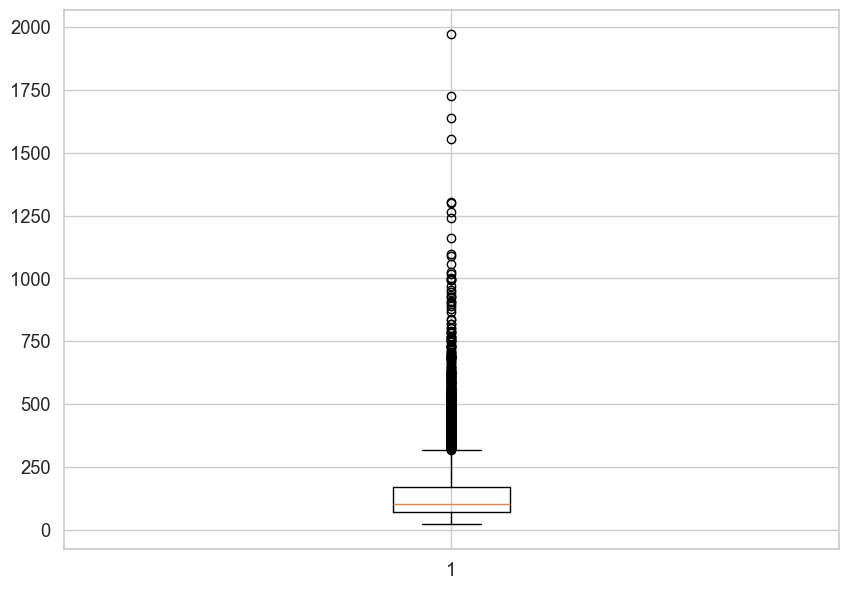

In [35]:
# box-plot of area_m

plt.figure(figsize = (10, 7))

plt.boxplot(hedges['area_m'])
plt.show()


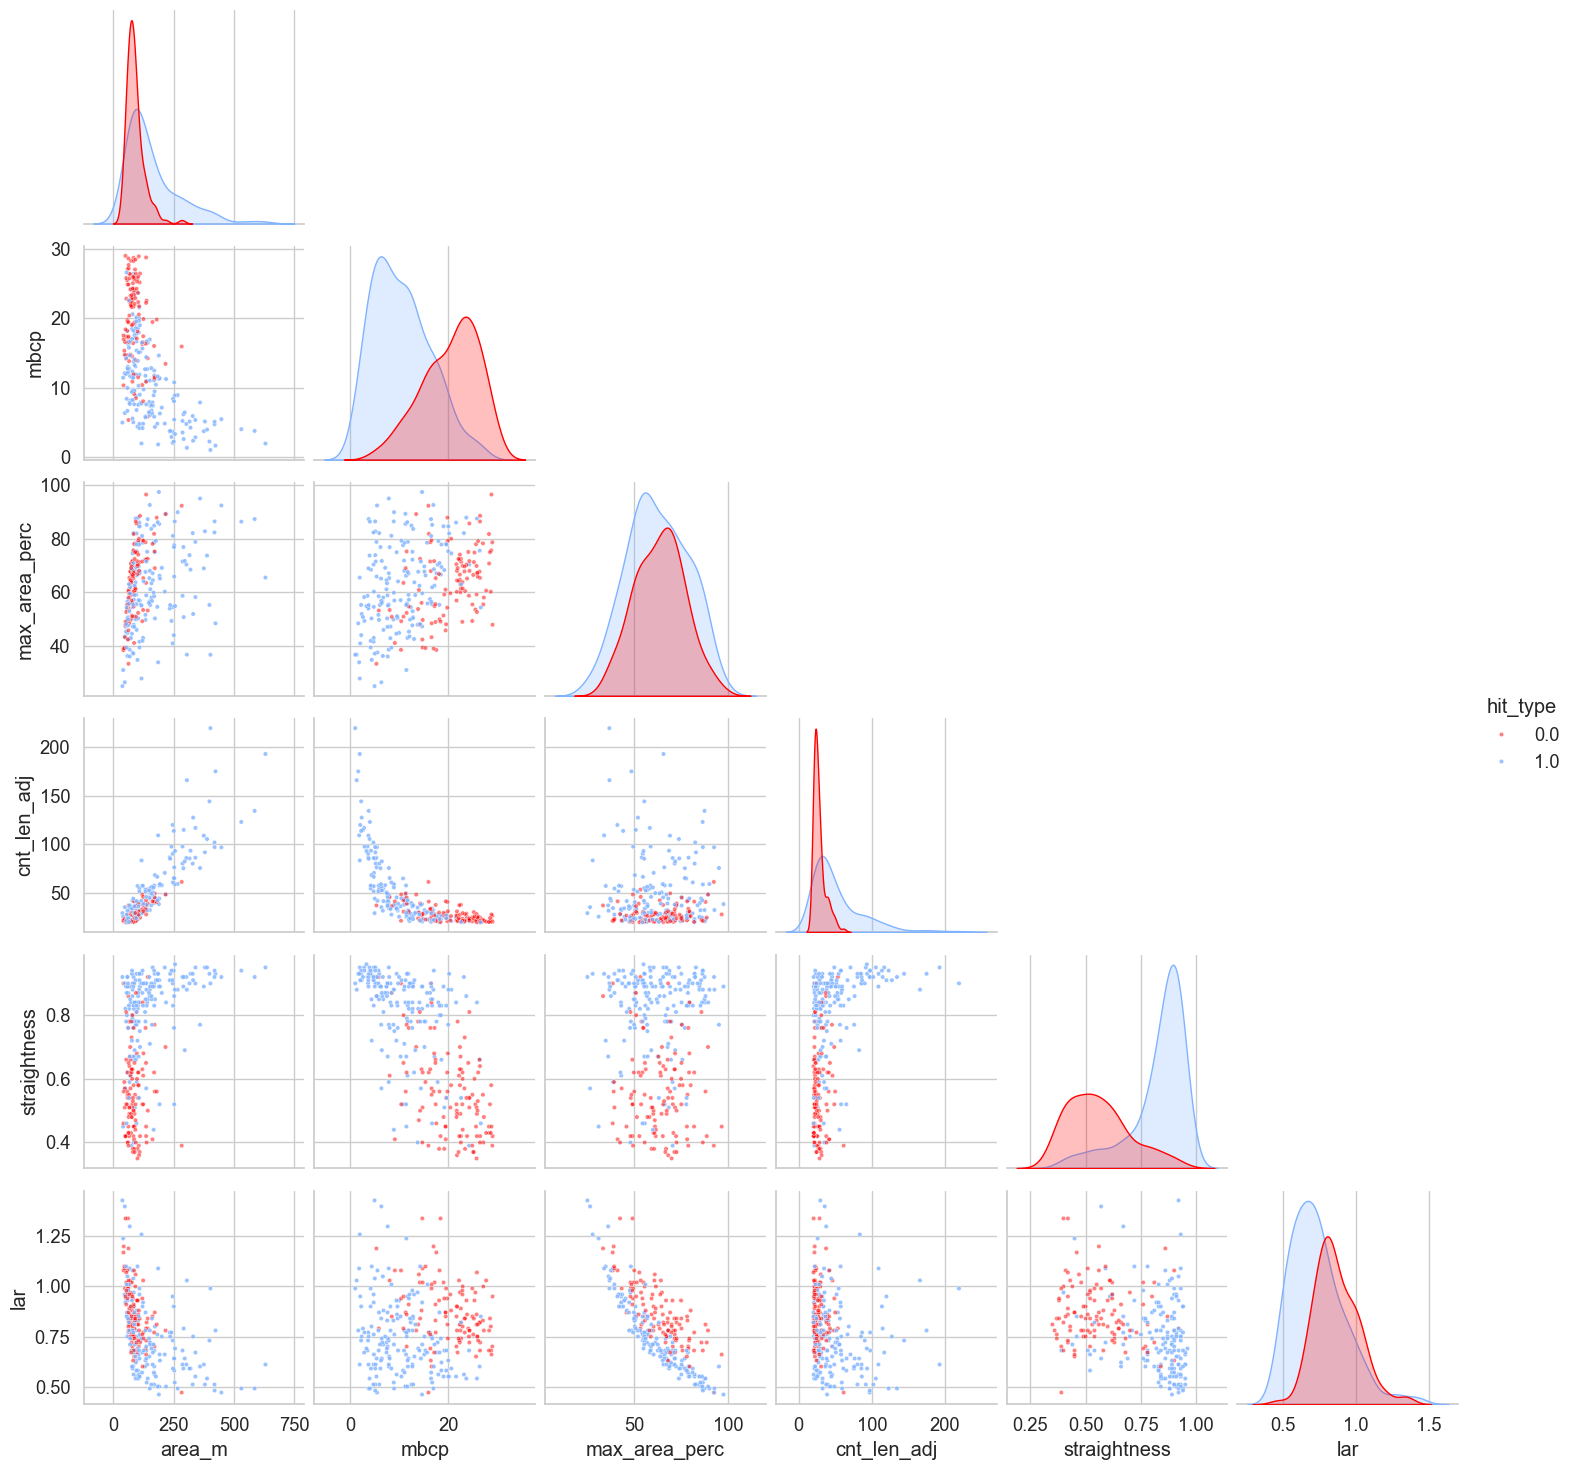

In [37]:
q3 = hedges['area_m'].quantile(0.9)
hedges_q3 = hedges[hedges['area_m'] <= q3]

sns.set_theme(style="whitegrid", font_scale=1.2)

# Define custom palette: 0 -> faint blue, 1 -> bright red
palette = {1: (0.5, 0.7, 1.0, 0.8),  # faint blue with alpha ~0.2
           0: (1.0, 0.0, 0.0, 0.5)}  # bright red with alpha ~0.8

sns.pairplot(
    hedges,
    hue="hit_type",
    kind="scatter",
    diag_kind="kde",
    palette=palette,
    plot_kws=dict(s=10),  # remove alpha here, handled in palette
    corner=True
)

plt.show()

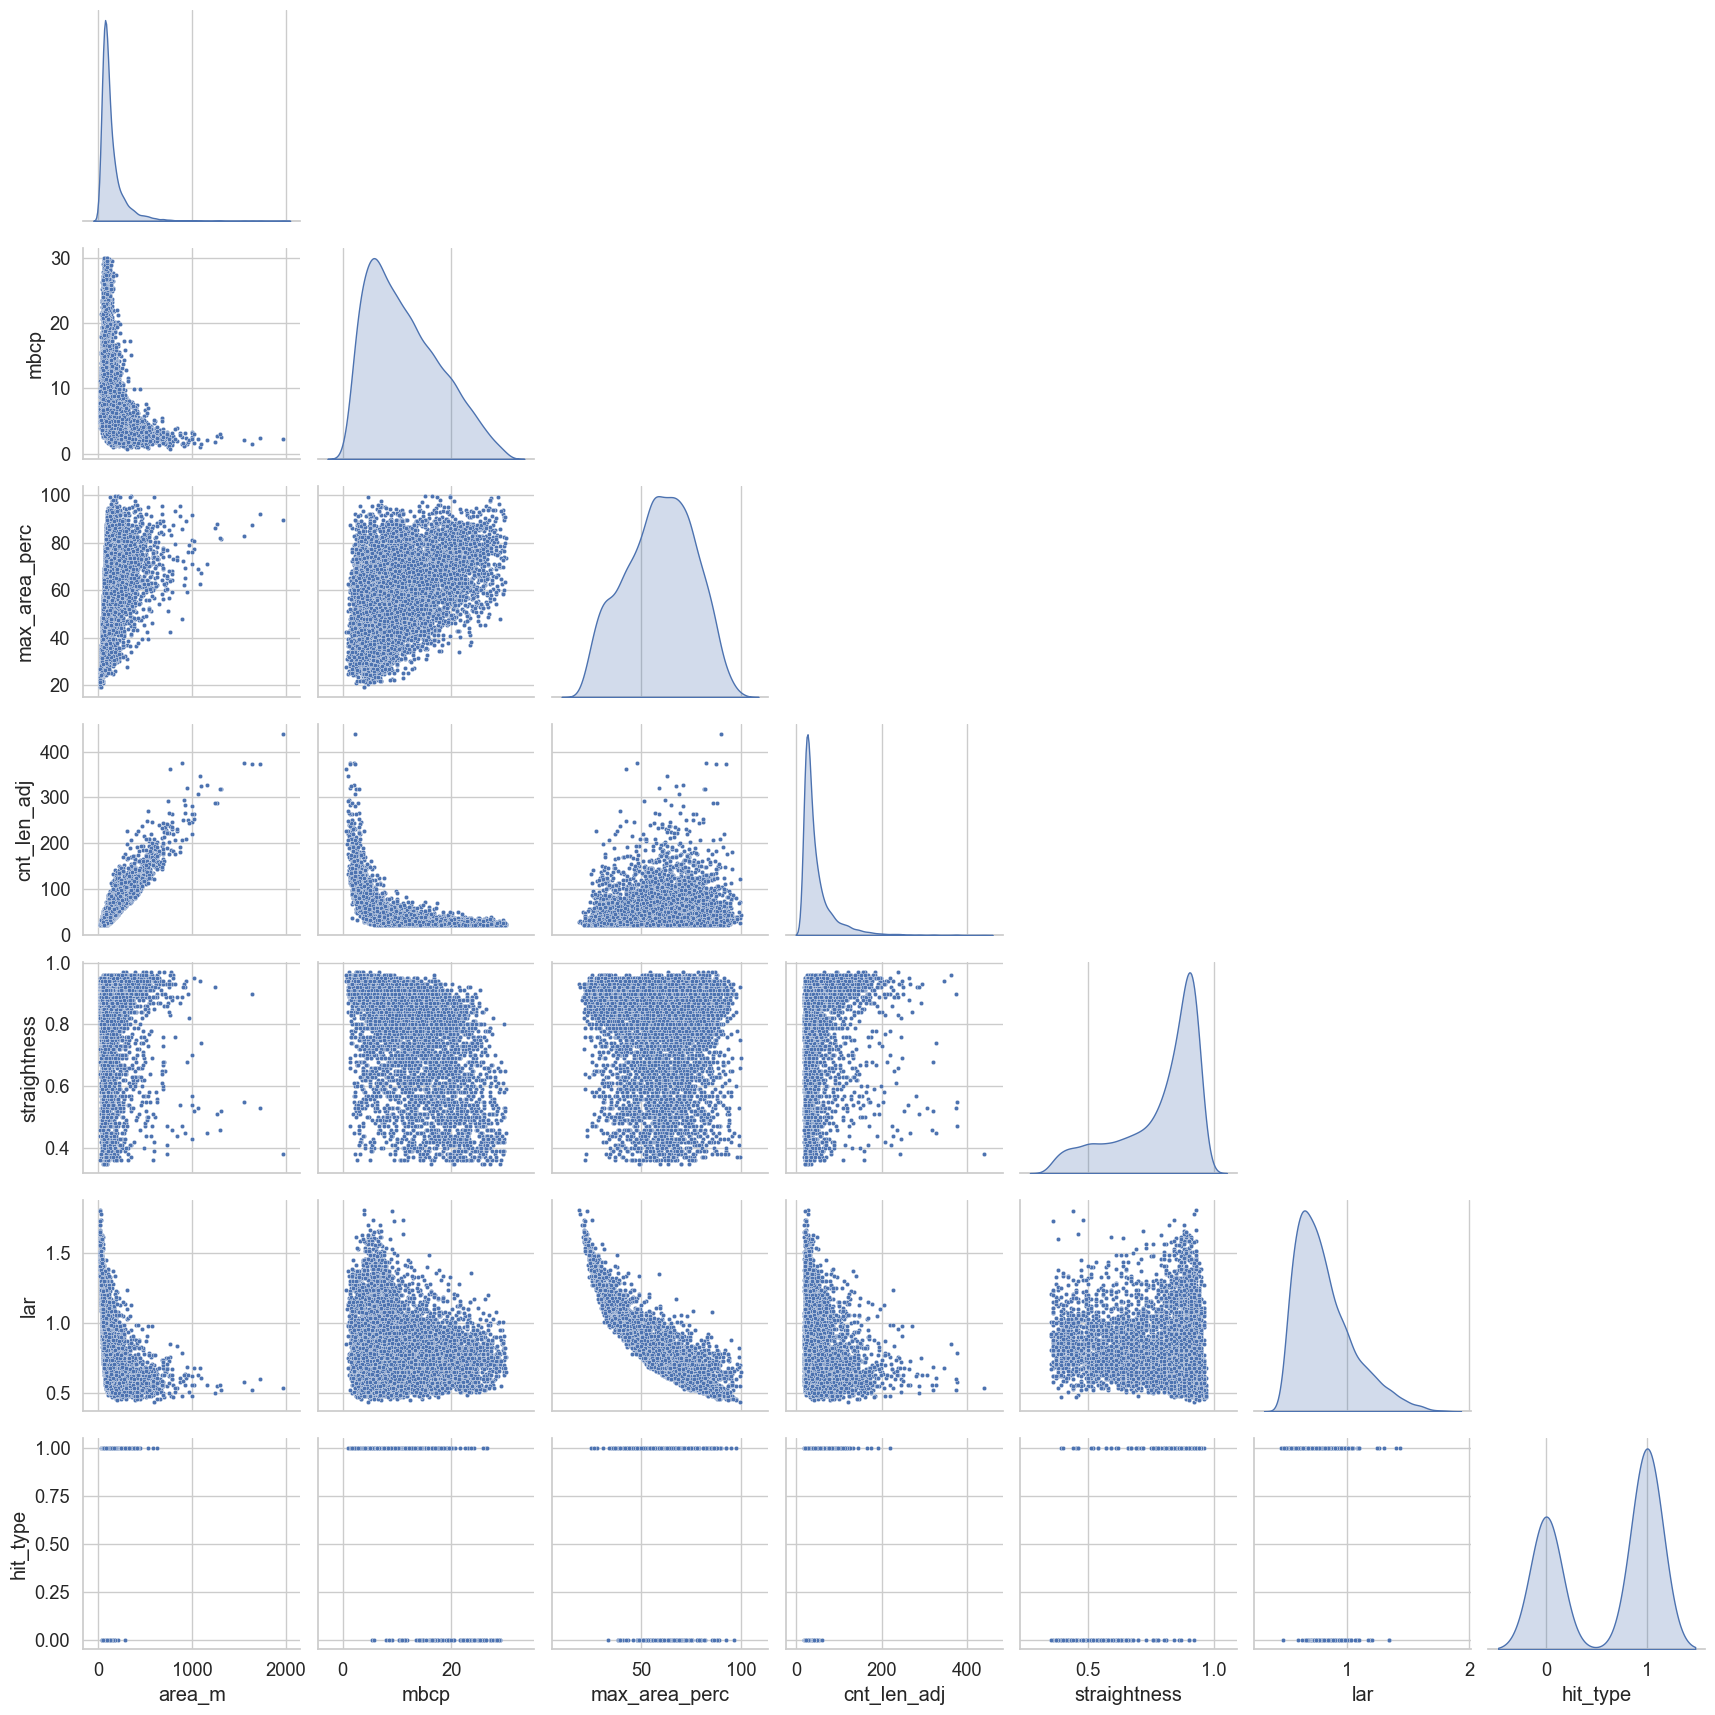

In [38]:
q3 = hedges['area_m'].quantile(0.9)
hedges_q3 = hedges[hedges['area_m'] <= q3]

sns.set_theme(style="whitegrid", font_scale=1.2)

sns.pairplot(
    hedges,
    kind="scatter",
    diag_kind="kde",
    plot_kws=dict(s=10),
    corner=True
)

plt.show()